<a href="https://colab.research.google.com/github/wannleach/MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 20: Numerical Differentiation**

*20.1 and 20.2: Finite Difference Approximating Derivatives*

Finite difference approximation is a technique used to estimate the values of a function given the slopes between neighboring points. Forward difference approximation takes the slope between a point and its forward adjacent neighbor. Concurrently, backward difference approximation takes the slope between a point and its backward adjacent neighbor. Central difference approximation combines these two methods by taking the slope between a point's forward adjacent neighbor and its backward adjacent neighbor. Below, this concept is demonstrated using the function $x^2$ for easy visualization.

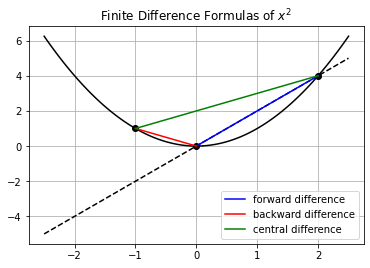

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# function x^2
x = np.linspace(-2.5, 2.5, 100)
f = x**2

x_0 = 0; y_0 = 0 # center point
x_right = 2; y_right = 4 # right point
x_left = -1; y_left = 1 # left point

# forward difference slope
x_forward = np.linspace(0, 2)
f_forward = 2*x_forward

# backwards difference slope
x_backward = np.linspace(-1, 0)
f_backward = -x_backward

# central difference slope
x_central = np.linspace(-1, 2)
f_central = x_central + 2

# exact slope
f_prime = 2*x

# plotting for comparison
plt.figure();
plt.plot(x, f, '-k');                                                   # function
plt.plot(x, f_prime, linestyle='dashed', color='black')                 # exact slope
plt.plot(x_0, y_0, 'ok', x_right, y_right, 'ok', x_left, y_left, 'ok'); # points for estimation
plt.plot(x_forward, f_forward, '-b', label='forward difference');       # forward difference
plt.plot(x_backward, f_backward, '-r', label='backward difference');    # backward difference
plt.plot(x_central, f_central, '-g', label='central difference');       # central difference
plt.title("Finite Difference Formulas of $x^2$");
plt.legend();
plt.grid();

The key to accuracy in finite difference approximation is the step size utilized in the difference formulas. With a larger step size, there are less opportunities to diverge from the exact value of the function. Thus, as step size decreases, error increases, and accuracy plummets.

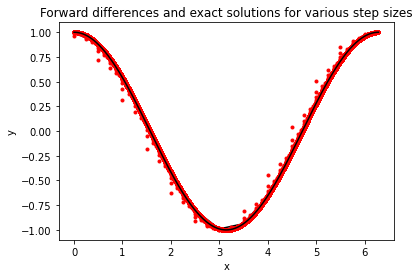

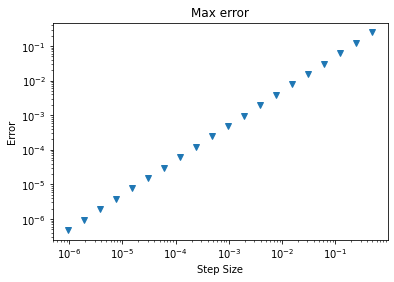

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# define step size
h = 1

# define number of iterations to perform
iterations = 20

# list to store our step sizes
step_size = [] 

# list to store max error for each step size
max_error = [] 

# compute finite difference approximation as step size decreases
plt.figure();
plt.title("Forward differences and exact solutions for various step sizes");
plt.xlabel('x');
plt.ylabel('y');
for i in range(iterations):
    h /= 2                          # halve the step size 
    step_size.append(h)             # store this step size
    x = np.arange(0, 2 * np.pi, h)  # x-values for original function
    y = np.sin(x)                   # original function
    forward_diff = np.diff(y)/h     # compute vector of forward differences
    x_diff = x[:-1]                 # compute forward difference x-values
    exact_solution = np.cos(x_diff) # compute exact solution
    
    # plot the forward difference and the exact solution
    plt.plot(x_diff, forward_diff, ".r", label='approx')
    plt.plot(x_diff, exact_solution, '-k', label='exact')

    # Compute max error between numerical derivative and exact solution
    max_error.append(max(abs(exact_solution - forward_diff)))

# show plot for forward differences and exact solutions
plt.show()

# produce log-log plot of max error versus step size; as step size increases, error increases
plt.figure();
plt.loglog(step_size, max_error, 'v');
plt.title("Max error");
plt.xlabel('Step Size');
plt.ylabel('Error');
plt.show()

*20.3: Approximating of Higher Order Derivatives*

As with any function, higher order derivatives can be estimated using Taylor series expansions of functions. This can be done by utilizing the finite difference approximation technique discussed above, combining forward and backward differences to achieve a the desired derivative order. Below, the second derivative of $sin(x)$ is taken with respect to $x$ and compared to the Taylor series approximation of the second derivative, calculated by adding together the backwards and forwards approximations of the Taylor series expansion of $sin(x)$.

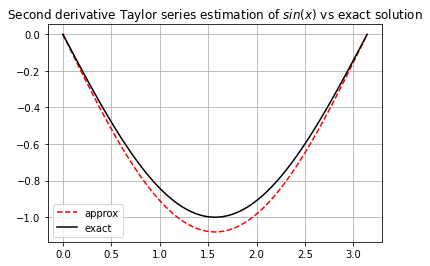

In [117]:
import numpy as np
import math
import matplotlib.pyplot as plt

# define Taylor series for sin(x) function
def sin_Tseries(x, n):
  sin_of_x = 0
  for i in range(n):
    sin_of_x += ((-1)**i)*( (x**(2*i+1)) / math.factorial(2*i+1) )
  return sin_of_x

# calculate Taylor series at x
n = 10
x = np.linspace(0, math.pi, 100)
sin_x = sin_Tseries(x, n)

# calculate Taylor series at backwards difference
x_backwards = x - 1
sin_xbackwards = sin_Tseries(x_backwards, n)

# calculate Taylor series at forwards difference
x_forwards = x + 1
sin_xforwards = sin_Tseries(x_forwards, n)

# add together to approximate second derivative
sin_together = -1*(sin_xbackwards + sin_xforwards)
x_together = x[:]
sin_doubleprime = -np.sin(x)

# plotting for comparison
plt.figure();
plt.plot(x_together, sin_together, label='approx', linestyle='dashed', color='red');
plt.plot(x, sin_doubleprime, '-k', label='exact', );
plt.title("Second derivative Taylor series estimation of $sin(x)$ vs exact solution");
plt.grid();
plt.legend();
plt.show();

*20.4: Numerical Differentiation with Noise*

With differentiation, noise that was originally present in a function can magnify to a significant degree, making the derivatives of functions with noise unusable. This can occur even if the original noise does not have much of an effect on the original function values.

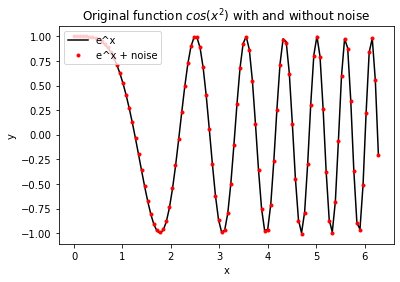

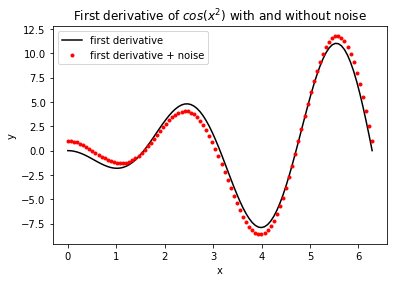

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# x-values
x = np.linspace(0, 2*np.pi, 100)

# noise
omega = 100
epsilon = 0.01

# original functions
y = np.cos(x**2)                      # no noise
y_noise = y + epsilon*np.sin(omega*x) # with noise

# derivative functions
yprime = -2*x*np.sin(2*x)                             # no noise
yprime_noise = yprime + epsilon*omega*np.cos(omega*x) # with noise

# plot original with and without noise
plt.figure();
plt.plot(x, y, 'k-', label='e^x');               # original plot
plt.plot(x, y_noise, 'r.', label='e^x + noise'); # noise plot
plt.xlabel('x');
plt.ylabel('y');
plt.title('Original function $cos(x^2)$ with and without noise')
plt.legend(loc='upper left');
plt.show()

# plot derivative with and without noise
plt.figure();
plt.plot(x, yprime, 'k-', label='first derivative');               # first derivative without noise
plt.plot(x, yprime_noise, 'r.', label='first derivative + noise'); # with noise
plt.title('First derivative of $cos(x^2)$ with and without noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();
plt.show()